In [323]:
# Import libraries, that are needed to fulfill analysis of the data
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

## Import dataset
- final data set containing all variables under consideration (see notebook 2)

In [324]:
# Import the merged dataset with weather, agricultural, GDP and rainfall data, which was created in the second notebook
df_avg_year = pd.read_csv('data_average_per_year.csv')

## Get overview of the merged dataset

In [325]:
# Look at the prepared dataframe
df_avg_year.head()

,Country,Year,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
0,Algeria,1961,19.091505,2.434777,22.821850,4.962476,11.3273,32.8581
1,Algeria,1962,18.851764,2.001469,22.531092,7.942018,12.3891,32.6300
2,Algeria,1963,18.688018,2.703015,22.573142,7.836509,13.5216,32.6186
3,Algeria,1964,18.542746,2.909352,22.629875,6.863724,11.8319,32.3364
4,Algeria,1965,18.544006,3.136259,22.416617,6.552506,12.1461,32.7202


In [326]:
# Check again for null values
null_counts = df_avg_year.isnull().sum()
null_counts

Country                   0
Year                      0
Agricultural land in %    0
GDP in billion $US        0
Temperature(Avg.)         0
Rainfall(Avg.)            0
Temperature(Min)          0
Temperature(Max)          0
dtype: int64

# Individual perspective per country
- since temperature is selected as a dependent variable in the following analysis, the different temperature data per country are examined in more detail here
- separate analysis are carried out for particularly conspicuous temperature data from individual countries

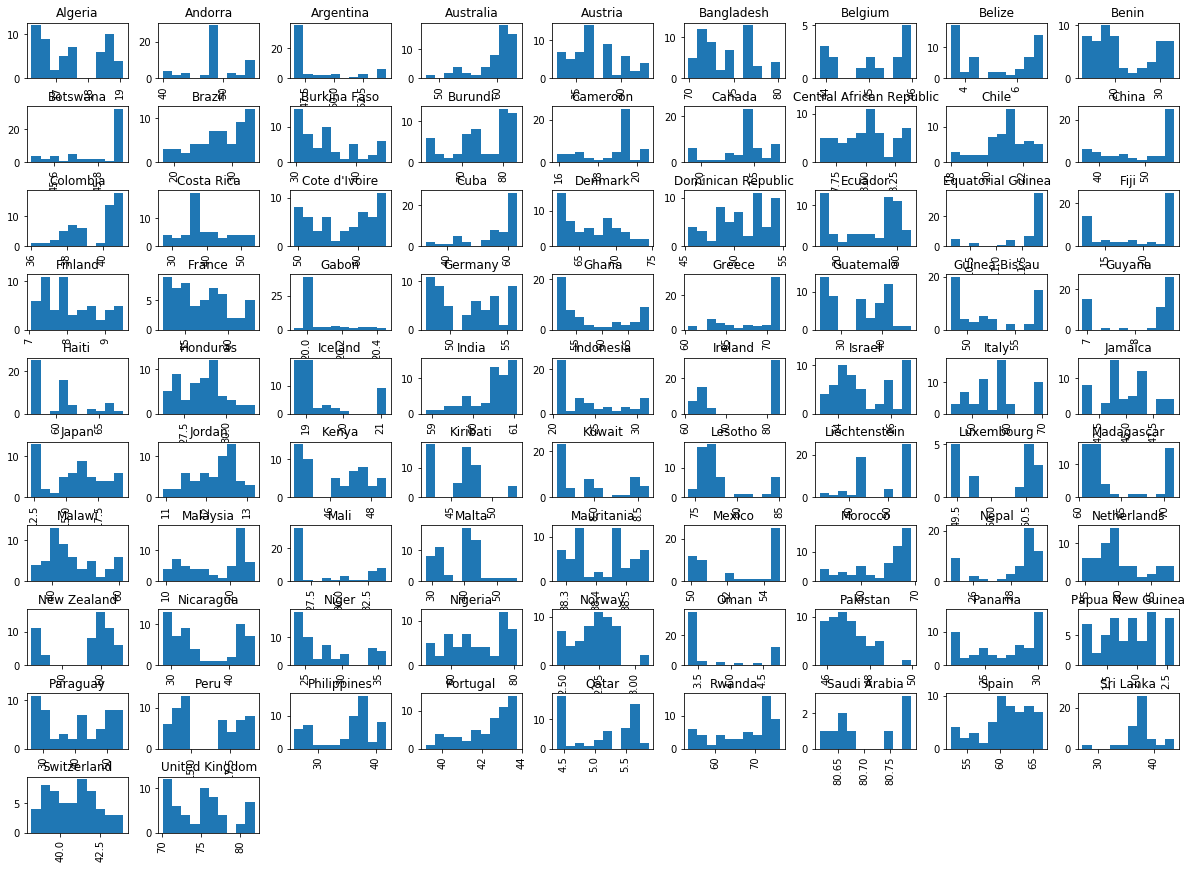

In [327]:
# Visualization of the individual temperature as histogram for each country
df_avg_year['Agricultural land in %'].hist(by=df_avg_year['Country'],figsize=(20,15))
plt.show()

# Deeper analysis for individual countries
- individual countries show particularly conspicuous distributions of the frequency of individual temperature values
- for particularly conspicuous temperature frequencies, individual visualizations are carried out for some countries

In [328]:
# Argentina shows a striking histogram, closer analysis makes sense
# Create subset for Argentina
subset_argentina = df_avg_year[df_avg_year['Country'] == 'Argentina']

In [329]:
# Look at the data
subset_argentina.head()

,Country,Year,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
60,Argentina,1961,50.363395,2774.878865,14.377203,48.121892,6.99971,20.7042
61,Argentina,1962,49.853655,24.450605,14.317740,34.798900,5.29234,20.6562
62,Argentina,1963,49.283989,18.272124,14.186253,50.893292,8.27449,20.6802
63,Argentina,1964,48.707380,25.605249,13.816357,41.050217,5.99390,21.1687
64,Argentina,1965,48.153061,28.344706,14.315731,45.325800,6.55712,21.0101


In [330]:
# Plots ????

In [331]:
# Mali shows a striking histogram, closer analysis makes sense
# Create subset for Mali
subset_mali = df_avg_year[df_avg_year['Country'] == 'Mali']

In [332]:
subset_mali.head()

,Country,Year,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
1620,Mali,1961,25.977921,358.581943,27.742200,29.292410,20.3635,33.5011
1621,Mali,1962,25.982019,358.581943,27.900700,30.342112,20.9852,33.1115
1622,Mali,1963,25.986117,358.581943,28.213942,28.670733,21.6125,33.1997
1623,Mali,1964,25.990215,358.581943,27.974933,32.285747,21.4159,32.6644
1624,Mali,1965,25.994312,358.581943,27.751933,30.251379,20.4957,33.1280


In [333]:
# Plots???

# Global perspective
- visualization of the development of the data from a global perspective (aggregated over all countries)

Since the data is not available for all countries for all years, the following analytical methods are applied to the average data, aggregated across all countries. This allows a view from a global perspective.

In [334]:
# Creation of a subset to visualize the development of the average temperature across all countries over time
df_temp_dev = df_avg_year.pivot(index='Country', columns='Year', values='Temperature(Avg.)')

In [335]:
# Check if it worked
df_temp_dev.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,22.821850,22.531092,22.573142,22.629875,22.416617,22.717400,22.391058,22.640567,22.653417,22.664983,...,23.670150,23.439533,23.282325,23.763258,24.085758,23.645283,23.631542,23.331608,23.877250,23.656875
Andorra,11.726597,10.541921,10.142039,11.021691,10.653587,11.246103,11.184950,11.005779,10.489219,10.987002,...,12.447481,11.851174,11.741287,12.268427,11.141372,12.653303,12.028118,11.583379,12.831938,12.573667
Argentina,14.377203,14.317740,14.186253,13.816357,14.315731,14.121293,14.446836,14.573787,14.666767,14.597797,...,14.863774,13.939900,14.817419,14.845897,14.364311,14.669653,15.008062,14.867685,14.846941,14.962130
Australia,21.639133,21.498942,21.413783,21.314983,21.780050,21.026875,21.352000,21.150642,21.525333,21.404800,...,21.909517,22.129900,21.830917,22.257358,21.685558,21.458775,21.651075,22.661508,22.475333,22.296192
Austria,6.887542,5.180842,5.493532,6.014180,5.373588,6.543029,6.528450,6.109064,5.743198,5.648705,...,7.142133,7.766454,7.574853,7.366118,6.357192,7.764766,7.524998,7.175280,8.275609,8.170463


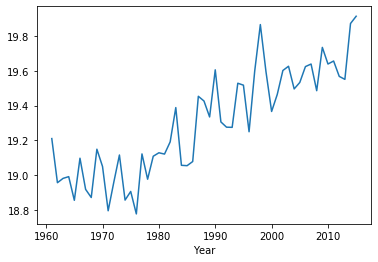

In [336]:
# Visualization of the development of the average temperature across all countries over time
temp_plot = df_temp_dev.mean(axis=0)
temp_plot.plot()

- A clear upwards trend in global temperature can be observed

In [337]:
# Creation of a subset to visualize the development of the share of agricultural land across all countries over time
df_agr_dev = df_avg_year.pivot(index='Country', columns='Year', values='Agricultural land in %')

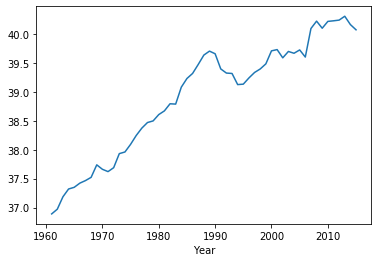

In [338]:
# Visualization of the development of the share of agricultural land across all countries over time
agr_plot = df_agr_dev.mean(axis=0)
agr_plot.plot()

- The percentage of agricultural land hast drastically risen in the early 90s, but is somehow constant for the past 25 years

In [339]:
# Creation of a subset to visualize the development of GDP across all countries over time
df_gdp_dev = df_avg_year.pivot(index='Country', columns='Year', values='GDP in billion $US')

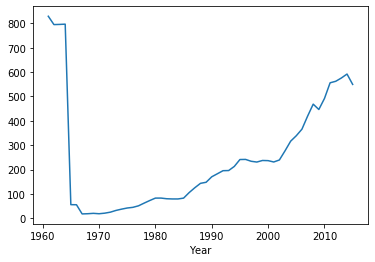

In [340]:
# Visualization of the development of GDP across all countries over time
gdp_plot = df_gdp_dev.mean(axis=0)
gdp_plot.plot()

- Worldwide GDP is rising over time with an increasing slope

In [341]:
# Creation of a subset to visualize the development of rainfall across all countries over time
df_rain_dev = df_avg_year.pivot(index='Country', columns='Year', values='Rainfall(Avg.)')

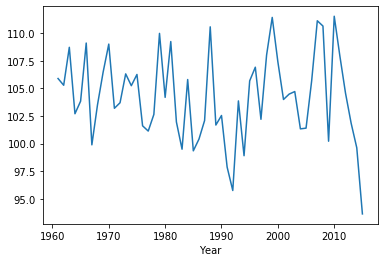

In [342]:
# Visualization of the development of rainfall across all countries over time
rain_plot = df_rain_dev.mean(axis=0)
rain_plot.plot()

- Rainfall underlies strong seasonal variability such no clear trend can be stated

In [343]:
# Calculation of the average of all variables per year across all countries 
# Idea/Goal: considering the development over time from a global perspective
df_avg_total = df_avg_year.groupby(['Year']).mean()

In [344]:
# Check if it worked
df_avg_total.head()

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
Year,,,,,,
1961,36.890236,829.095768,19.209938,105.902617,13.668278,24.103289
1962,36.972024,794.869938,18.955687,105.292499,13.354653,24.055408
1963,37.186663,795.579495,18.980646,108.732038,13.104857,24.081296
1964,37.320988,796.633743,18.990590,102.708413,13.175111,24.114922
1965,37.350315,56.416164,18.854335,103.845735,13.313065,23.734884


In [345]:
# Check if it worked
df_avg_total.tail()

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
Year,,,,,,
2011,40.229761,556.182855,19.656787,107.950493,13.930658,24.707745
2012,40.241963,562.387927,19.568188,104.582968,13.470413,24.974404
2013,40.308723,575.909756,19.551115,101.854178,13.956644,25.063800
2014,40.164575,592.043212,19.872881,99.624681,14.482449,24.927780
2015,40.074023,549.571952,19.914742,93.628297,14.263313,25.239578


In [346]:
# Get information about 
df_avg_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1961 to 2015
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Agricultural land in %  55 non-null     float64
 1   GDP in billion $US      55 non-null     float64
 2   Temperature(Avg.)       55 non-null     float64
 3   Rainfall(Avg.)          55 non-null     float64
 4   Temperature(Min)        55 non-null     float64
 5   Temperature(Max)        55 non-null     float64
dtypes: float64(6)
memory usage: 3.0 KB


# Statistical Tests

Check assumptions for linear regression in order to apply methods

## Normality Test

In [347]:
from scipy.stats import shapiro

In [348]:
# Shapiro Wilk Test
stat, p_value = shapiro(df_avg_total)
p_value > 0.05 

False

- Not normally distributed

## Correlation Test

In [349]:
# Create correlation matrix
df_avg_total.corr() 

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
Agricultural land in %,1.000000,0.175511,0.820384,-0.090173,0.593971,0.777567
GDP in billion $US,0.175511,1.000000,0.409924,0.057832,0.157398,0.376430
Temperature(Avg.),0.820384,0.409924,1.000000,-0.039204,0.750763,0.910502
Rainfall(Avg.),-0.090173,0.057832,-0.039204,1.000000,-0.001856,-0.095060
Temperature(Min),0.593971,0.157398,0.750763,-0.001856,1.000000,0.575712
Temperature(Max),0.777567,0.376430,0.910502,-0.095060,0.575712,1.000000


- Highest correlation regarding avg. Temperature: GDP, Agricultural land (excluded:Temperature (Min/Max)
- Assumptions for Pearson Correlation Coefficient: no extreme outliers, linear relationship, homoscedascity, normal distribution (negligible because of n>30), pairwise features for one item (assumption met), continuous variables (assumption met)

In [350]:
from scipy.stats import pearsonr

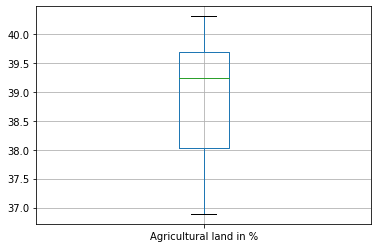

In [351]:
# Check outliers
df_avg_total.boxplot('Agricultural land in %') 

- No extreme outliers

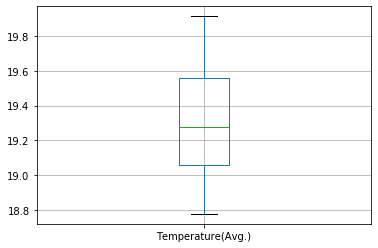

In [352]:
# Check outliers
df_avg_total.boxplot('Temperature(Avg.)') 

- No extreme outliers

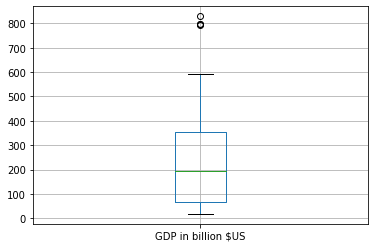

In [353]:
# Check outliers
df_avg_total.boxplot('GDP in billion $US') 

- Only a few outliers 

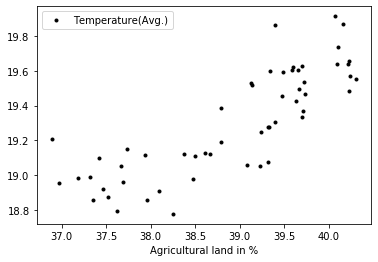

In [354]:
# Check linear relationship
df_avg_total.plot(x='Agricultural land in %', y='Temperature(Avg.)', style='k.') 

- Appears to be linear

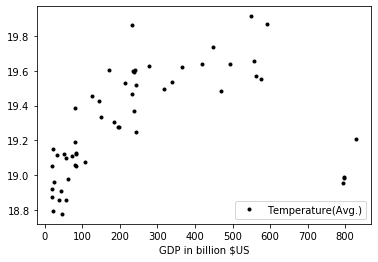

In [355]:
# Check linear relationship
df_avg_total.plot(x='GDP in billion $US', y='Temperature(Avg.)', style='k.')

-  Appears to be slightly linear

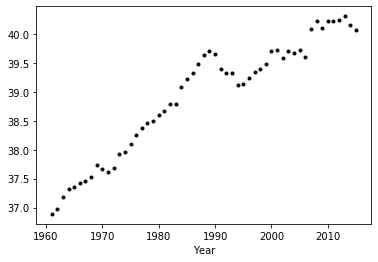

In [356]:
# Check homoscedascity
df_avg_total['Agricultural land in %'].plot(style='k.') 

- Appears to be homoscedastic

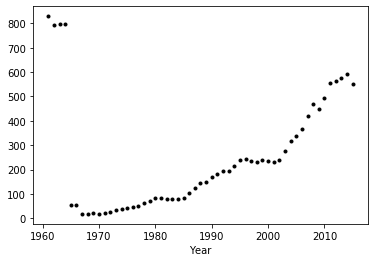

In [357]:
# Check homoscedascity
df_avg_total['GDP in billion $US'].plot(style='k.') 

- Appears to be heteroscedastic

In [358]:
# Try log function to reduce heteroscedasticity
data_log = df_avg_total.copy()
data_log['Agricultural land in %'] = np.log(data_log['Agricultural land in %'])
data_log['GDP in billion $US'] = np.log(data_log['GDP in billion $US'])

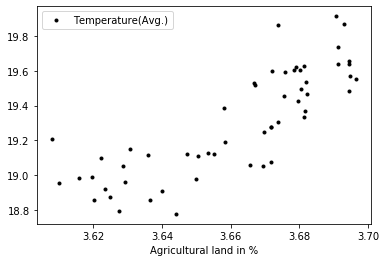

In [359]:
# Check linear relationship again
data_log.plot(x='Agricultural land in %', y='Temperature(Avg.)', style='k.') 

- No improvement

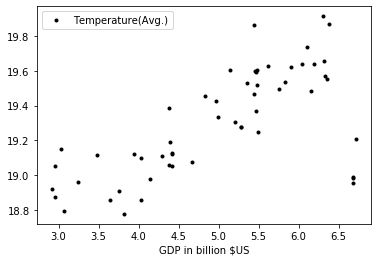

In [360]:
# Check linear relationship again
data_log.plot(x='GDP in billion $US', y='Temperature(Avg.)', style='k.') 

- Better than before -> improvement

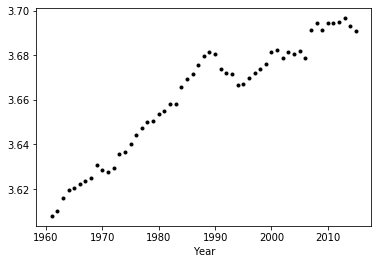

In [361]:
# Check homoscedascity again
data_log['Agricultural land in %'].plot(style='k.') 

- No improvement

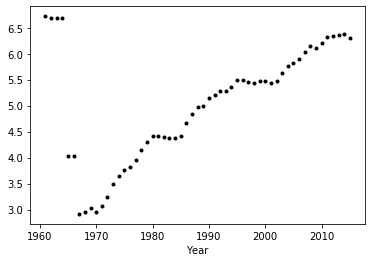

In [362]:
# Check homoscedascity again
data_log['GDP in billion $US'].plot(style='k.') 

- No improvement

In [363]:
# Calculate r with original data (log try not successful)
pearsonr(df_avg_total['Agricultural land in %'],df_avg_total['Temperature(Avg.)']) 

(0.820383854877354, 1.7965928294543063e-14)

- High positiv correlation betwees agricultural land and average temperature

In [364]:
pearsonr(df_avg_total['GDP in billion $US'], df_avg_total['Temperature(Avg.)'])

(0.40992351047408243, 0.0018830835373849961)

- Positiv correlation betwees GDP and average temperature

### Multicollinearity and Autocorrelation
- Test multicollinearity with Variance Inflation Factor (VIF)

In [365]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df_avg_total.columns
vif["VIF"] = [variance_inflation_factor(df_avg_total.values, i) for i in range(df_avg_total.shape[1])]
vif

,features,VIF
0,Agricultural land in %,4494.537899
1,GDP in billion $US,2.376167
2,Temperature(Avg.),44560.454322
3,Rainfall(Avg.),624.722896
4,Temperature(Min),4697.956539
5,Temperature(Max),25210.170772


- An extremely high multicollinearity of the independent variable 'Agricultural land in %' can be observed

In [366]:
# test autocorrelation
df_avg_total['Agricultural land in %'].autocorr() 

0.9921322616688153

- High autocorrelation

In [367]:
df_avg_total['GDP in billion $US'].autocorr() 

0.8925758479677051

- High autocorrelation

### Conclusion:
Not all assumptions were met. 
Especially a high multicollinearity and autocorrelation was tested.
Despite the insufficient database, a linear regression gets implemented next.

# Applied Methods

## Linear Regression

### Simple Linear Regression

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [369]:
# Dataset for linear regression
data_lr = df_avg_total

In [370]:
# Show data
data_lr

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
Year,,,,,,
1961,36.890236,829.095768,19.209938,105.902617,13.668278,24.103289
1962,36.972024,794.869938,18.955687,105.292499,13.354653,24.055408
1963,37.186663,795.579495,18.980646,108.732038,13.104857,24.081296
1964,37.320988,796.633743,18.990590,102.708413,13.175111,24.114922
1965,37.350315,56.416164,18.854335,103.845735,13.313065,23.734884
1966,37.422487,56.078305,19.096815,109.118108,13.573965,24.056406
1967,37.466726,18.464393,18.917389,99.890753,13.310143,24.088052
1968,37.522787,19.261822,18.870486,103.517841,13.165824,23.773694
1969,37.738694,20.825057,19.148685,106.483362,13.406693,24.371366


In [371]:
# Show count of rows and columns
data_lr.shape

(55, 6)

In [372]:
# Show column names
data_lr.columns

Index(['Agricultural land in %', 'GDP in billion $US', 'Temperature(Avg.)',
       'Rainfall(Avg.)', 'Temperature(Min)', 'Temperature(Max)'],
      dtype='object')

In [373]:
# Show years
data_lr.index

Int64Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

In [374]:
# Show statistics
data_lr.describe()

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,38.919115,247.807065,19.300161,104.236972,13.707005,24.452492
std,1.004768,229.852404,0.305102,4.015552,0.336003,0.415952
min,36.890236,18.464393,18.775900,93.628297,12.973087,23.734884
25%,38.027172,68.039147,19.054869,101.650419,13.488919,24.109105
50%,39.241977,195.695099,19.275672,104.002773,13.704675,24.433389
75%,39.684088,352.502266,19.559652,106.705883,13.945199,24.708539
max,40.308723,829.095768,19.914742,111.547997,14.482449,25.359723


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad3c0a3a50>,
      dtype=object)

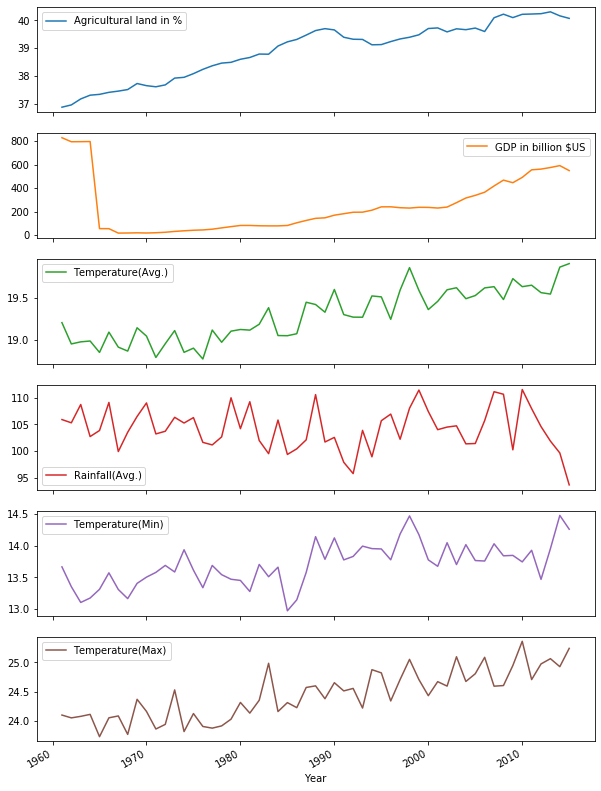

In [375]:
# Plot features based on years
data_lr.plot(subplots=True, figsize=(10,15))

In [376]:
# Create correlation matrix again
data_lr.corr()

,Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
Agricultural land in %,1.000000,0.175511,0.820384,-0.090173,0.593971,0.777567
GDP in billion $US,0.175511,1.000000,0.409924,0.057832,0.157398,0.376430
Temperature(Avg.),0.820384,0.409924,1.000000,-0.039204,0.750763,0.910502
Rainfall(Avg.),-0.090173,0.057832,-0.039204,1.000000,-0.001856,-0.095060
Temperature(Min),0.593971,0.157398,0.750763,-0.001856,1.000000,0.575712
Temperature(Max),0.777567,0.376430,0.910502,-0.095060,0.575712,1.000000


In [377]:
# Show features rank with largest correlation of avg. temp.
data_lr.corr().abs().nlargest(6, 'Temperature(Avg.)').index

Index(['Temperature(Avg.)', 'Temperature(Max)', 'Agricultural land in %',
       'Temperature(Min)', 'GDP in billion $US', 'Rainfall(Avg.)'],
      dtype='object')

Text(0, 0.5, 'Temperature(Avg.)')

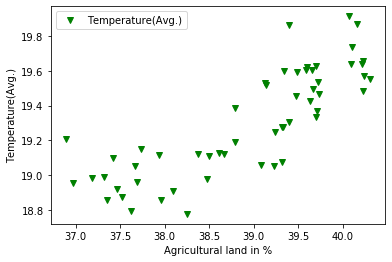

In [378]:
# Plot correlation of land and avg. temp.
data_lr.plot(x='Agricultural land in %', y='Temperature(Avg.)', style='gv')
plt.xlabel('Agricultural land in %')
plt.ylabel('Temperature(Avg.)')

- A slightly linear relationship can be observed

In [379]:
# Define x and y variables for simple linear regression: first look at correlation of land and avg. temp. (TAMTAM choice)
x_var = data_lr['Agricultural land in %'].values.reshape(-1,1)
y_var = data_lr['Temperature(Avg.)'].values.reshape(-1,1)

In [380]:
# Split data into train and test datasets (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, shuffle=False)

In [381]:
# Show count of rows and columns in train and test datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 1), (11, 1), (44, 1), (11, 1))

In [382]:
# Show train and test datasets
x_train, x_test, y_train, y_test

(array([[36.89023637],
        [36.97202418],
        [37.18666271],
        [37.3209883 ],
        [37.35031467],
        [37.42248683],
        [37.46672632],
        [37.52278707],
        [37.73869358],
        [37.66211449],
        [37.6218175 ],
        [37.68979011],
        [37.93276876],
        [37.96123946],
        [38.09310526],
        [38.24642066],
        [38.37419369],
        [38.47059997],
        [38.49872678],
        [38.60811205],
        [38.67199681],
        [38.79498678],
        [38.78933825],
        [39.08234279],
        [39.23205052],
        [39.31929285],
        [39.47454624],
        [39.63710802],
        [39.70556603],
        [39.65991485],
        [39.39759689],
        [39.32603822],
        [39.31912592],
        [39.12682139],
        [39.13429856],
        [39.24197724],
        [39.33655845],
        [39.39692152],
        [39.48518372],
        [39.71005354],
        [39.73200932],
        [39.58956792],
        [39.69964165],
        [39

In [383]:
# Create linear regression model
lin_reg = LinearRegression()

In [384]:
# Apply model on train dataset -> train model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [385]:
# Calculate R-Squared (value of 1 = perfect fit)
lin_reg.score(x_test,y_test)

-0.9574890867539869

- A negative R^2 is really confusing, since R^2 is by definition [0,1]

In [386]:
# Calculate intercept of feature (expected mean value of temperature when Agricultural land is 0)
lin_reg.intercept_

array([10.60825447])

In [387]:
# Calculate coefficient of feature
lin_reg.coef_

array([[0.22271863]])

In [388]:
# Make prediction based on model
y_pred = lin_reg.predict(x_test)

In [389]:
# Create table to compare actual and predicted values
table_act_pred = pd.DataFrame({'Actual Temp.': y_test.flatten(), 'Predicted Temp.': y_pred.flatten()})
table_act_pred

,Actual Temp.,Predicted Temp.
0,19.533304,19.456027
1,19.624689,19.428611
2,19.639392,19.538481
3,19.485814,19.566908
4,19.735278,19.539621
5,19.639531,19.565892
6,19.656787,19.568172
7,19.568188,19.570889
8,19.551115,19.585758
9,19.872881,19.553654


- Actual and predicted temperature show an upward trend, but the predicted temperature is lower than the actual temperature

Text(0, 0.5, 'Predicted Temp.')

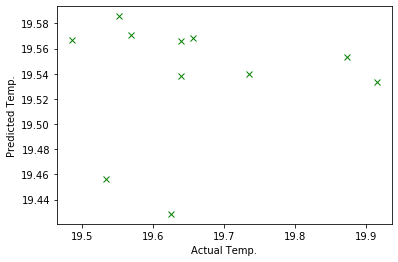

In [390]:
# Plot comparison
plt.plot(y_test, y_pred, 'gx')
plt.xlabel('Actual Temp.')
plt.ylabel('Predicted Temp.')

- High variance (see chart below)

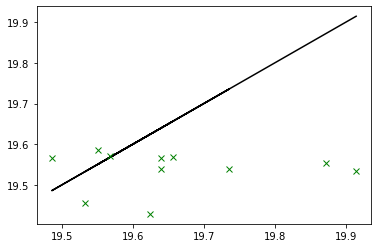

In [391]:
# Plot comparison with additional reference line
plt.plot(y_test, y_test, 'k-')
plt.plot(y_test, y_pred, 'gx')

- The green crosses are far away from the linear line, thus a high variance is present

In [392]:
# Calculate Mean Absolute Error (absolute difference between actuals and predictions)
metrics.mean_absolute_error(y_test, y_pred)

0.1410090484761061

In [393]:
# Calculate Mean Squared Error (squared difference between actuals and predictions) -> the closer to 0 the better
metrics.mean_squared_error(y_test, y_pred)

0.03283673756557171

In [394]:
# calculate Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.18120909901429263

#### Interpretation: 
R-Squared: -0.9574890867539869 -> model explains -95.7% of the variance in the dependent variable... extremely bad!

Coefficient: 0.22271863 -> Agricultural land increases by 1, predicted value of avg. Temperature increases by 0.22271863

Mean Absolute Error: 0.1410090484761061 -> min avg. Temp.: 18.775900, max avg. Temp.: 19.914742, difference slighty high!

Root Mean Squared Error: 0.18120909901429263 -> ~ 0.93% of mean of avg. Temp. (19.300161) -> algorithmn quite accurate

### Multiple Linear Regression

In [395]:
# Show features with largest correlation of avg. temp.
data_lr.corr().abs().nlargest(6, 'Temperature(Avg.)').index

Index(['Temperature(Avg.)', 'Temperature(Max)', 'Agricultural land in %',
       'Temperature(Min)', 'GDP in billion $US', 'Rainfall(Avg.)'],
      dtype='object')

In [396]:
# Define x and y variables for multiple linear regression: largest correlation features (temp. excluded)
x_mvar = data_lr[['Agricultural land in %', 'GDP in billion $US']].values
y_mvar = data_lr['Temperature(Avg.)'].values

In [397]:
# Show x variable features
x_mvar

array([[ 36.89023637, 829.09576796],
       [ 36.97202418, 794.86993805],
       [ 37.18666271, 795.57949529],
       [ 37.3209883 , 796.63374343],
       [ 37.35031467,  56.41616383],
       [ 37.42248683,  56.07830511],
       [ 37.46672632,  18.46439309],
       [ 37.52278707,  19.26182212],
       [ 37.73869358,  20.82505705],
       [ 37.66211449,  19.20389426],
       [ 37.6218175 ,  21.49006016],
       [ 37.68979011,  25.59286587],
       [ 37.93276876,  32.69085924],
       [ 37.96123946,  38.03015968],
       [ 38.09310526,  42.67973138],
       [ 38.24642066,  45.40547831],
       [ 38.37419369,  51.62911378],
       [ 38.47059997,  62.7143673 ],
       [ 38.49872678,  73.3639267 ],
       [ 38.60811205,  83.31012424],
       [ 38.67199681,  83.39256506],
       [ 38.79498678,  80.69937975],
       [ 38.78933825,  79.82156759],
       [ 39.08234279,  79.81775406],
       [ 39.23205052,  83.1985681 ],
       [ 39.31929285, 106.09669895],
       [ 39.47454624, 125.92391474],
 

In [398]:
# Show y variable
y_mvar

array([19.20993822, 18.95568698, 18.98064618, 18.99058982, 18.85433481,
       19.09681504, 18.9173892 , 18.8704862 , 19.14868483, 19.0492791 ,
       18.79402558, 18.95823111, 19.11528585, 18.85550192, 18.90528577,
       18.77589955, 19.12151279, 18.9758285 , 19.10817232, 19.12815882,
       19.12061099, 19.19072555, 19.38850101, 19.05595547, 19.05378249,
       19.07764917, 19.45346972, 19.426429  , 19.33456229, 19.60594377,
       19.30594025, 19.27567187, 19.27462561, 19.5287696 , 19.51766799,
       19.24927041, 19.5984615 , 19.86674962, 19.59547218, 19.36613975,
       19.46405369, 19.60224047, 19.62665081, 19.49606603, 19.53330402,
       19.62468873, 19.63939209, 19.48581354, 19.73527839, 19.63953051,
       19.65678746, 19.56818782, 19.55111538, 19.8728805 , 19.91474193])

In [399]:
# Split data into train and test datasets (60/40)
x_mtrain, x_mtest, y_mtrain, y_mtest = train_test_split(x_mvar, y_mvar, test_size=0.4, shuffle=False)

In [400]:
# Show train and test datasets
x_mtrain, x_mtest, y_mtrain, y_mtest

(array([[ 36.89023637, 829.09576796],
        [ 36.97202418, 794.86993805],
        [ 37.18666271, 795.57949529],
        [ 37.3209883 , 796.63374343],
        [ 37.35031467,  56.41616383],
        [ 37.42248683,  56.07830511],
        [ 37.46672632,  18.46439309],
        [ 37.52278707,  19.26182212],
        [ 37.73869358,  20.82505705],
        [ 37.66211449,  19.20389426],
        [ 37.6218175 ,  21.49006016],
        [ 37.68979011,  25.59286587],
        [ 37.93276876,  32.69085924],
        [ 37.96123946,  38.03015968],
        [ 38.09310526,  42.67973138],
        [ 38.24642066,  45.40547831],
        [ 38.37419369,  51.62911378],
        [ 38.47059997,  62.7143673 ],
        [ 38.49872678,  73.3639267 ],
        [ 38.60811205,  83.31012424],
        [ 38.67199681,  83.39256506],
        [ 38.79498678,  80.69937975],
        [ 38.78933825,  79.82156759],
        [ 39.08234279,  79.81775406],
        [ 39.23205052,  83.1985681 ],
        [ 39.31929285, 106.09669895],
        [ 39

In [401]:
# Create linear regression model
mlin_reg = LinearRegression()

In [402]:
# Apply model on train dataset -> train model
mlin_reg.fit(x_mtrain, y_mtrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
# Calculate R-Squared (value of 1 = perfect fit)
mlin_reg.score(x_mtest,y_mtest)

-1.2434070396432255

- worse than simple linear regression

In [404]:
# Calculate intercept of feature (expected mean value of temperature when Agricultural land and GDP are 0)
mlin_reg.intercept_

11.909179745466663

In [405]:
# Calculate coefficients of features
mlin_reg.coef_

array([0.18635954, 0.00027803])

In [406]:
# Make prediction based on model
y_mpred = mlin_reg.predict(x_mtest)

In [407]:
# Create table to compare actual and predicted values
mtable_act_pred = pd.DataFrame({'Actual Temp.': y_mtest.flatten(), 'Predicted Temp.': y_mpred.flatten()})
mtable_act_pred

,Actual Temp.,Predicted Temp.
0,19.528770,19.260099
1,19.517668,19.269374
2,19.249270,19.289574
3,19.598461,19.305064
4,19.866750,19.315448
5,19.595472,19.333680
6,19.366140,19.375404
7,19.464054,19.377964
8,19.602240,19.353706
9,19.626651,19.384636


- Results are not better than for simple linear regression
- An upward trend is predicted, but prediction does not match actual values

Text(0, 0.5, 'Predicted Temp.')

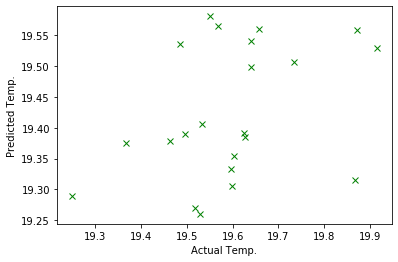

In [408]:
# plot comparison
plt.plot(y_mtest, y_mpred, 'gx')
plt.xlabel('Actual Temp.')
plt.ylabel('Predicted Temp.')

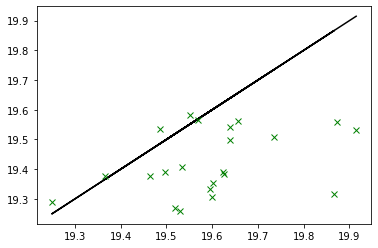

In [409]:
# plot comparison with additional reference line
plt.plot(y_mtest, y_mtest, 'k-', label='actual')
plt.plot(y_mtest, y_mpred, 'gx', label='predicted')

- values are still quite far away from the line
- high variance

In [410]:
# Calculate Mean Absolute Error (absolute difference between actuals and predictions)
metrics.mean_absolute_error(y_mtest, y_mpred)

0.18460873868938743

In [411]:
# Calculate Mean Squared Error (squared difference between actuals and predictions) -> the closer to 0 the better
metrics.mean_squared_error(y_mtest, y_mpred)

0.052025913746645565

In [412]:
# Calculate Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_mtest, y_mpred))

0.22809189759096127

#### Interpretation: 
R-Squared: -1.2434070396432255 -> model explains -124% of the variance in dependent variable... extremely bad!

Coefficients: 0.18635954, 0.00027803 -> Agricultural land increases by 1, predicted value of avg. Temperature increases by 0.18635954; GDP increases by 1, predicted value of avg. Temperature increases by 0.00027803 

Mean Absolute Error: 0.18460873868938743 -> min avg. Temp.: 18.775900, max avg. Temp.: 19.914742, difference high!

Root Mean Squared Error: 0.22809189759096127 -> ~ 2.3% of mean of avg. Temp. (19.3) -> algorithmn quite accurate

### Polynomial Regression

In [413]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [414]:
# Define variables
x_pvar = data_lr[['Agricultural land in %','GDP in billion $US']].values
y_pvar = data_lr['Temperature(Avg.)'].values

In [415]:
# include ploynomial features, create new matrix consisting polynomial combination of features
pipe = Pipeline([('scale', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('method', LinearRegression())])

In [416]:
# Train and Test data
x_ptrain, x_ptest, y_ptrain, y_ptest = train_test_split(x_pvar, y_pvar, test_size=0.2, shuffle=False)

In [417]:
x_ptrain, x_ptest, y_ptrain, y_ptest

(array([[ 36.89023637, 829.09576796],
        [ 36.97202418, 794.86993805],
        [ 37.18666271, 795.57949529],
        [ 37.3209883 , 796.63374343],
        [ 37.35031467,  56.41616383],
        [ 37.42248683,  56.07830511],
        [ 37.46672632,  18.46439309],
        [ 37.52278707,  19.26182212],
        [ 37.73869358,  20.82505705],
        [ 37.66211449,  19.20389426],
        [ 37.6218175 ,  21.49006016],
        [ 37.68979011,  25.59286587],
        [ 37.93276876,  32.69085924],
        [ 37.96123946,  38.03015968],
        [ 38.09310526,  42.67973138],
        [ 38.24642066,  45.40547831],
        [ 38.37419369,  51.62911378],
        [ 38.47059997,  62.7143673 ],
        [ 38.49872678,  73.3639267 ],
        [ 38.60811205,  83.31012424],
        [ 38.67199681,  83.39256506],
        [ 38.79498678,  80.69937975],
        [ 38.78933825,  79.82156759],
        [ 39.08234279,  79.81775406],
        [ 39.23205052,  83.1985681 ],
        [ 39.31929285, 106.09669895],
        [ 39

In [418]:
# Fit model
pipe.fit(x_ptrain, y_ptrain)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('method',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [419]:
# Apply model
y_ppred = pipe.predict(x_ptest)

In [420]:
# Compare actual and predicted value
ptable_act_pred = pd.DataFrame({'Actual Temp.': y_ptest.flatten(), 'Predicted Temp.': y_ppred.flatten()})
ptable_act_pred

,Actual Temp.,Predicted Temp.
0,19.533304,19.606589
1,19.624689,19.595349
2,19.639392,19.659786
3,19.485814,19.651200
4,19.735278,19.646504
5,19.639531,19.629164
6,19.656787,19.549879
7,19.568188,19.542227
8,19.551115,19.530898
9,19.872881,19.480599


- no accurate prediction, a slight downward trend is predicted

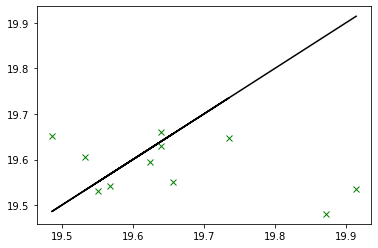

In [421]:
# Plot comparison of actual and predicted values
plt.plot(y_ptest, y_ptest, 'k-', label='actual')
plt.plot(y_ptest, y_ppred, 'gx', label='predicted')

### OLS -  Ordinary Least Squares Regression

In [422]:
import statsmodels.api as sm

In [423]:
# Define variables
x_olsvar = data_lr[['Agricultural land in %','GDP in billion $US']].values
y_olsvar = data_lr['Temperature(Avg.)'].values

In [424]:
# Split data
x_olstrain, x_olstest, y_olstrain, y_olstest = train_test_split(x_olsvar, y_olsvar, test_size=0.3, shuffle=False)

In [425]:
# Fit model
ols_model = sm.OLS(y_olstrain, x_olstrain).fit()

In [426]:
# Predict model
y_olspred = ols_model.predict(x_olstest)

In [427]:
y_olspred

array([19.70412836, 19.81493967, 19.82195696, 19.75721925, 19.83785064,
       19.8501347 , 19.89428364, 19.85209859, 20.13333258, 20.23106697,
       20.15514757, 20.24512752, 20.29504259, 20.30541346, 20.34789083,
       20.28782962, 20.21336313])

In [428]:
y_olstest

array([19.59547218, 19.36613975, 19.46405369, 19.60224047, 19.62665081,
       19.49606603, 19.53330402, 19.62468873, 19.63939209, 19.48581354,
       19.73527839, 19.63953051, 19.65678746, 19.56818782, 19.55111538,
       19.8728805 , 19.91474193])

In [429]:
# Get a summary of model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.275e+04
Date:                Fri, 26 Jun 2020   Prob (F-statistic):                    1.52e-67
Time:                        19:23:58   Log-Likelihood:                         -3.7316
No. Observations:                  38   AIC:                                      11.46
Df Residuals:                      36   BIC:                                      14.74
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4948      0.001    338.989      0.000       0.492       0.498
x2             0.0007      0.000      3.571      0.001       0.000       0.001
==============================================================================
Omnibus:                        2.611   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.406
Skew:                           0.100   Prob(JB):                        0.495
Kurtosis:                       2.079   Cond. No.                         9.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
# Compare predicted and actual values
olstable_act_pred = pd.DataFrame({'Actual Temp.': y_olstest.flatten(), 'Predicted Temp.': y_olspred.flatten()})
olstable_act_pred

,Actual Temp.,Predicted Temp.
0,19.595472,19.704128
1,19.366140,19.814940
2,19.464054,19.821957
3,19.602240,19.757219
4,19.626651,19.837851
5,19.496066,19.850135
6,19.533304,19.894284
7,19.624689,19.852099
8,19.639392,20.133333
9,19.485814,20.231067


- Values are increasing, but too high compared to actual values

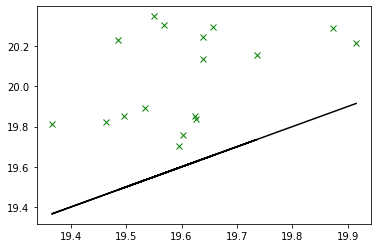

In [431]:
# Plot comparison
plt.plot(y_olstest, y_olstest, 'k-', label='actual')
plt.plot(y_olstest, y_olspred, 'gx', label='predicted')

- All predicted values are too high
- extremly high variance, values only vary above reference line